In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


# Lorenz 63 System

Simulate the classic chaotic dynamical system 

$$
\begin{align*}
\dot{x} &= \sigma (-x + y)\\
\dot{y} &= rx - y - xz \\
\dot{z} &= xy - bz
\end{align*}
$$

where $\sigma$, $r$ and $b$ are positive dimensionless constants.  Given values of $b$ and $\sigma$, chaos should ensure if $r> r_c$, where

$$
r_c = \sigma\left(\frac{\sigma + b + 3}{\sigma - b -1}\right)
$$

In [2]:
def f(X, t, sigma, b, r):
    x, y, z = X  
    return [sigma * (y - x), x * (r - z) - y, x * y - b * z]  # Derivatives


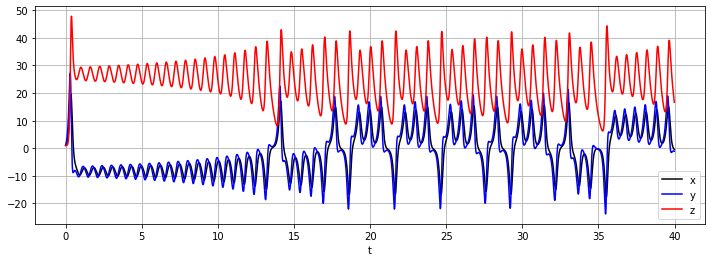

In [3]:
r = 28.0
sigma = 10.0
b  = 8.0 / 3.0

X0 = [1.0, 1.0, 1.0]  # initial vector X0 = [x(0), y(0), z(0)]

t = np.arange(0.0, 40.0, 0.01)

X = odeint(f, X0, t, args=(sigma,b,r))

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(t, X[:,0],'k')
ax.plot(t, X[:,1],'b')
ax.plot(t, X[:,2],'r')
ax.grid(True)
ax.set(xlabel='t')
ax.legend(['x','y','z'],loc="lower right")


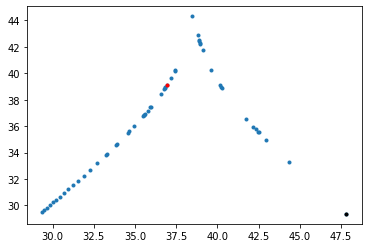

In [5]:
z = X[:,2]
zpeaks = []
for j in range(1,len(z)-1):
    if z[j]>z[j-1] and z[j]>z[j+1]:
        zpeaks = zpeaks + [z[j]]
        
plt.plot(zpeaks[0:-1],zpeaks[1:],'.')
plt.plot(zpeaks[0],zpeaks[1],'k.')  # plot the first point with a black dot
plt.plot(zpeaks[len(zpeaks)-2],zpeaks[len(zpeaks)-1],'r.')  # plot the last point with a red dot


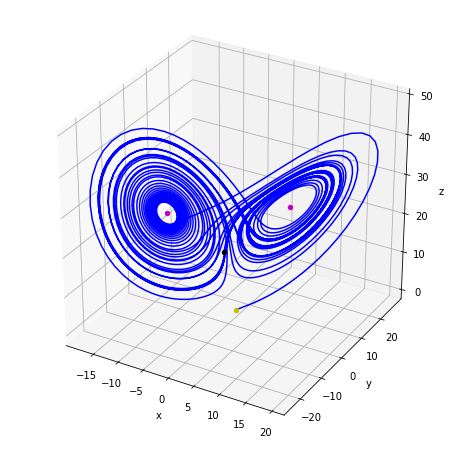

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], 'b')
ax.scatter(X[0, 0], X[0, 1], X[0, 2] , c='y')     # make a yellow dot at the start
ax.scatter(X[-1,0], X[-1,1], X[-1,2] , c='k')     # make a black dot at the end
ax.set(xlabel='x', ylabel='y', zlabel='z')

# Add markers for the two unstable fixed points:  
X2 = [np.sqrt(b*(r-1)), np.sqrt(b*(r-1)), r-1]
X3 = [-np.sqrt(b*(r-1)), -np.sqrt(b*(r-1)), r-1]
ax.scatter(X2[0], X2[1], X2[2] , c='m')
ax.scatter(X3[0], X3[1], X3[2] , c='m')


In [22]:
def fpeigs(sigma, b, r):
    # Compute eigenvalues for the two FPs X2, X3 (not the FP at the origin) for L63
    a0 = sigma+b+1
    a1 = b*(r+sigma)
    a2 = 2*sigma*b*(r-1)
    coef = [1, a0, a1, a2]
    
    return np.roots(coef)

def rc(sigma, b):
    # critical r_c.  r > r_c is chaotic
    return sigma*((sigma+b+3)/(sigma-b-1))

In [23]:
rc(sigma, b)

24.736842105263154

In [24]:
fpeigs(sigma, b, 28.0)   # for r > rc,  two of the three eigenvalues have positive real parts

array([-13.85457791 +0.j        ,   0.09395562+10.19450522j,
         0.09395562-10.19450522j])

In [25]:
fpeigs(sigma, b, 24.0)  # for r<rc, all three eigenvalues have negative real parts

array([-13.6216132 +0.j        ,  -0.02252673+9.48959737j,
        -0.02252673-9.48959737j])